In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [3]:
data['TotalCharges'].replace(" ",np.NaN,inplace=True)
data['TotalCharges'].isnull().sum()


11

In [4]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
data.loc[:,'TotalCharges'] = map(float,data['TotalCharges'])

In [6]:
# data.info()
data.drop(columns="customerID",inplace=True)
sex={"Male":0,"Female":1}
data['gender']=data['gender'].map(sex)

In [7]:
data['MultipleLines'].replace("No phone service","No",inplace=True)
data.replace("No internet service","No",inplace=True)

In [8]:
# data.head()
data.replace("No",0,inplace=True)
data.replace("Yes",1,inplace=True)

In [9]:
# data.loc[:,'OnlineSecurity'] = map(float,data['OnlineSecurity'])
# print data['StreamingMovies'].unique()
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,0,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,1,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
gender              7043 non-null int64
SeniorCitizen       7043 non-null int64
Partner             7043 non-null int64
Dependents          7043 non-null int64
tenure              7043 non-null int64
PhoneService        7043 non-null int64
MultipleLines       7043 non-null int64
InternetService     7043 non-null object
OnlineSecurity      7043 non-null int64
OnlineBackup        7043 non-null int64
DeviceProtection    7043 non-null int64
TechSupport         7043 non-null int64
StreamingTV         7043 non-null int64
StreamingMovies     7043 non-null int64
Contract            7043 non-null object
PaperlessBilling    7043 non-null int64
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null int64
dtypes: float64(2), int64(15), object(3)
memory usage: 1.1+ MB


In [11]:
# from sklearn.preprocessing import LabelEncoder
# data=data.apply(LabelEncoder().fit_transform)

In [12]:
# data.info()
data['InternetService'].replace(0,"No internet service",inplace=True)
# print data['InternetService'].unique()
# print data['Contract'].unique()
# print data['PaymentMethod'].unique()

one_hot_1 = pd.get_dummies(data['InternetService'], prefix='InternetService')
data = pd.concat([data,one_hot_1] ,axis=1)
data.drop(['InternetService'],axis=1,inplace=True)

one_hot_2 = pd.get_dummies(data['Contract'], prefix='Contract')
data = pd.concat([data,one_hot_2] ,axis=1)
data.drop(['Contract'],axis=1,inplace=True)

one_hot_3 = pd.get_dummies(data['PaymentMethod'], prefix='PaymentMethod')
data = pd.concat([data,one_hot_3] ,axis=1)
data.drop(['PaymentMethod'],axis=1,inplace=True)


In [13]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No internet service,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [14]:
data.corr()['TotalCharges']

gender                                    -0.000048
SeniorCitizen                              0.102411
Partner                                    0.319072
Dependents                                 0.064653
tenure                                     0.825880
PhoneService                               0.113008
MultipleLines                              0.469042
OnlineSecurity                             0.412619
OnlineBackup                               0.510100
DeviceProtection                           0.522881
TechSupport                                0.432868
StreamingTV                                0.515709
StreamingMovies                            0.519867
PaperlessBilling                           0.157830
MonthlyCharges                             0.651065
TotalCharges                               1.000000
Churn                                     -0.199484
InternetService_DSL                       -0.052190
InternetService_Fiber optic                0.360769
InternetServ

In [15]:
# temp = data[['tenure','MonthlyCharges','DeviceProtection','StreamingMovies','TotalCharges']]

# temptest=temp[pd.isnull(temp).any(axis=1)]
# temptrain=temp.dropna()

In [16]:
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.wrappers.scikit_learn import KerasRegressor
# import matplotlib.pyplot as plt

# def model():
#     regressor = Sequential()
#     regressor.add(Dense(activation="relu",input_dim=4,units=8,kernel_initializer="normal"))
#     regressor.add(Dense(activation="relu",input_dim=8,units=1,kernel_initializer="normal"))
#     regressor.compile(optimizer="Adam",loss="mean_squared_error")
#     return regressor

# estimator = KerasRegressor(build_fn=model, epochs=100, batch_size=1, verbose=1)
# estimator.fit(temptrain.drop(columns=['TotalCharges'],axis=1), temptrain.TotalCharges)

# pred=estimator.predict(temptrain.drop(columns=['TotalCharges']))
# pred=pd.DataFrame(pred)

# diff=temptrain.TotalCharges-pred

# plt.plot(diff[0])
# # sns.plot()
# plt.show()


In [17]:
data['TotalCharges'][data['TotalCharges'].notnull()].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

In [18]:
data['TotalCharges'].fillna(data['TotalCharges'].mean(),inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 27 columns):
gender                                     7043 non-null int64
SeniorCitizen                              7043 non-null int64
Partner                                    7043 non-null int64
Dependents                                 7043 non-null int64
tenure                                     7043 non-null int64
PhoneService                               7043 non-null int64
MultipleLines                              7043 non-null int64
OnlineSecurity                             7043 non-null int64
OnlineBackup                               7043 non-null int64
DeviceProtection                           7043 non-null int64
TechSupport                                7043 non-null int64
StreamingTV                                7043 non-null int64
StreamingMovies                            7043 non-null int64
PaperlessBilling                           7043 non-null int64
MonthlyChar

In [19]:
import seaborn as sns

# temp=data['TotalCharges']

# print data['TotalCharges'][data['TotalCharges'].notnull()]

sns.distplot(data['TotalCharges'][data['TotalCharges'].notnull()])

In [20]:
# import matplotlib.pyplot as plt
# plt.show()

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data.drop(columns="Churn"), data.Churn, test_size=0.3, random_state=42)

In [22]:
Y_train=pd.DataFrame(Y_train)
Y_test=pd.DataFrame(Y_test)
# Y_test.info()
# Y_train.info()

In [23]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix

In [24]:
clf1 = RandomForestClassifier( max_depth=10,random_state=49)
# clf1=LogisticRegression()
clf1.fit(data.drop('Churn',axis=1), data['Churn'])
preds1=clf1.predict(X_test)

In [25]:
print(classification_report(Y_test,preds1))

             precision    recall  f1-score   support

          0       0.89      0.94      0.91      1539
          1       0.82      0.68      0.74       574

avg / total       0.87      0.87      0.87      2113



In [26]:
print sum(abs(Y_test.Churn - preds1))

271


In [27]:
features = pd.DataFrame()
features['feature'] = X_train.columns
features['importance'] = clf1.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

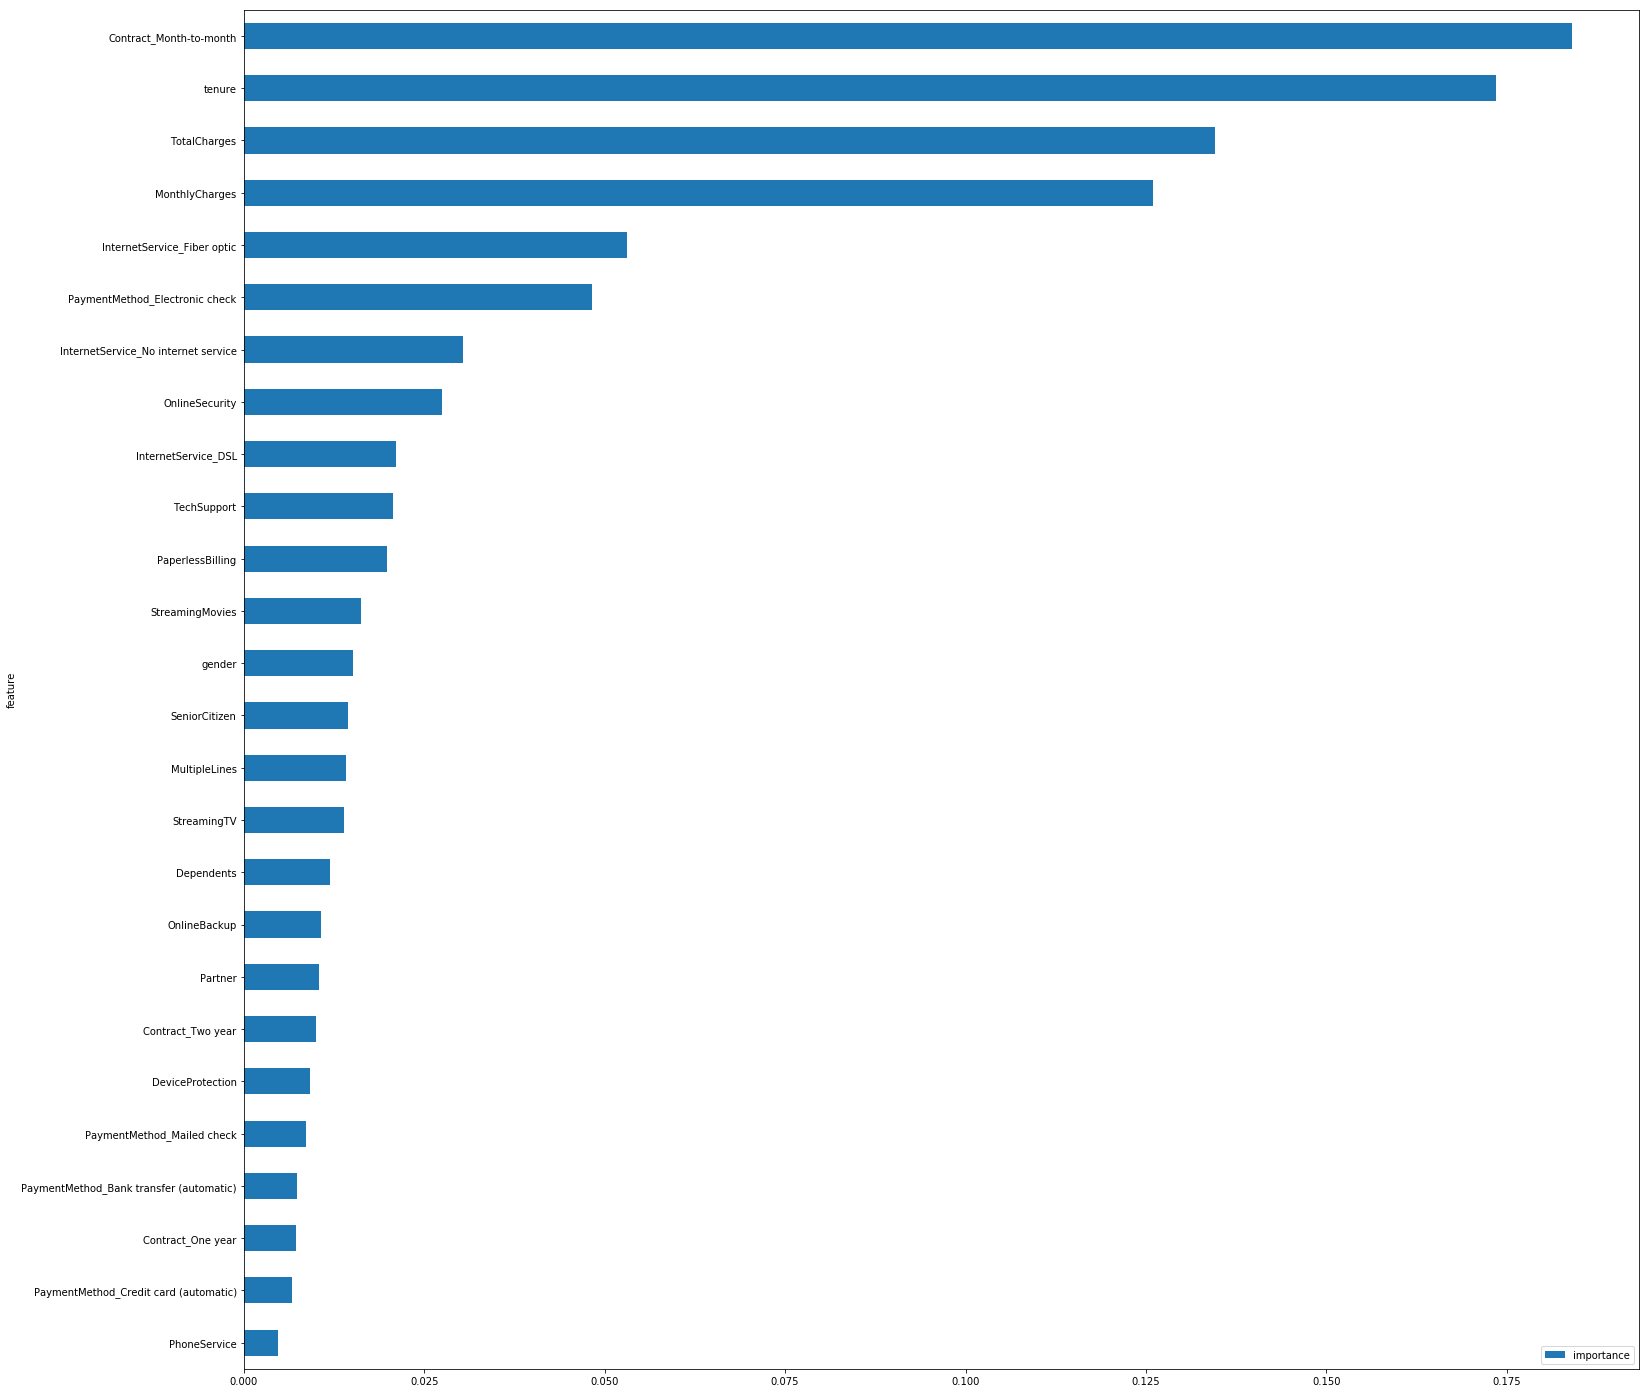

In [28]:
features.plot(kind='barh', figsize=(25, 25))



In [29]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4930 entries, 1695 to 860
Data columns (total 26 columns):
gender                                     4930 non-null int64
SeniorCitizen                              4930 non-null int64
Partner                                    4930 non-null int64
Dependents                                 4930 non-null int64
tenure                                     4930 non-null int64
PhoneService                               4930 non-null int64
MultipleLines                              4930 non-null int64
OnlineSecurity                             4930 non-null int64
OnlineBackup                               4930 non-null int64
DeviceProtection                           4930 non-null int64
TechSupport                                4930 non-null int64
StreamingTV                                4930 non-null int64
StreamingMovies                            4930 non-null int64
PaperlessBilling                           4930 non-null int64
MonthlyCh

In [30]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
import matplotlib.pyplot as plt

# def model():
regressor = Sequential()
regressor.add(Dense(activation="relu",input_dim=26,units=13,kernel_initializer="normal"))
regressor.add(Dense(activation="sigmoid",input_dim=13,units=1,kernel_initializer="normal"))
regressor.compile(optimizer="Adam",loss="binary_crossentropy",metrics=['accuracy'])
#     return regressor

# estimator = KerasRegressor(build_fn=model, epochs=10, batch_size=1, verbose=1)
regressor.fit(X_train, Y_train, batch_size=30, epochs=100)

pred=regressor.predict(X_test)
pred=(pred>0.5)
pred=pd.DataFrame(pred)


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,pred)
print cm


/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Epoch 1/100
4930/4930 [==============================] - 0s 88us/step - loss: 0.7079 - acc: 0.7546
Epoch 2/100
4930/4930 [==============================] - 0s 47us/step - loss: 0.5225 - acc: 0.7755
Epoch 3/100
4930/4930 [==============================] - 0s 39us/step - loss: 0.4939 - acc: 0.7884
Epoch 4/100
4930/4930 [==============================] - 0s 39us/step - loss: 0.4821 - acc: 0.7890
Epoch 5/100
4930/4930 [==============================] - 0s 59us/step - loss: 0.4717 - acc: 0.7888
Epoch 6/100
4930/4930 [==============================] - 0s 51us/step - loss: 0.4600 - acc: 0.7903
Epoch 7/100
4930/4930 [==============================] - 0s 48us/step - loss: 0.4626 - acc: 0.7909
Epoch 8/100
4930/4930 [==============================] - 0s 51us/step - loss: 0.4614 - acc: 0.7905
Epoch 9/100
4930/4930 [==============================] - 0s 49us/step - loss: 0.4535 - acc: 0.7957
Epoch 10/100
4930/4930 [==============================] - 0s 55us/step - loss: 0.4452 - acc: 0.7976
Epoch 11/

Epoch 83/100
4930/4930 [==============================] - 0s 35us/step - loss: 0.4196 - acc: 0.8055
Epoch 84/100
4930/4930 [==============================] - 0s 40us/step - loss: 0.4200 - acc: 0.7990
Epoch 85/100
4930/4930 [==============================] - 0s 38us/step - loss: 0.4211 - acc: 0.8026
Epoch 86/100
4930/4930 [==============================] - 0s 37us/step - loss: 0.4239 - acc: 0.7994
Epoch 87/100
4930/4930 [==============================] - 0s 61us/step - loss: 0.4198 - acc: 0.8030
Epoch 88/100
4930/4930 [==============================] - 0s 64us/step - loss: 0.4205 - acc: 0.8028
Epoch 89/100
4930/4930 [==============================] - 0s 90us/step - loss: 0.4163 - acc: 0.8041
Epoch 90/100
4930/4930 [==============================] - 0s 70us/step - loss: 0.4188 - acc: 0.8039
Epoch 91/100
4930/4930 [==============================] - 0s 71us/step - loss: 0.4194 - acc: 0.8047
Epoch 92/100
4930/4930 [==============================] - 0s 43us/step - loss: 0.4165 - acc: 0.8028


In [31]:
(cm[0][0]+cm[1][1]+0.0)/(0.0+sum(cm[0])+sum(cm[1]))

0.7889256980596309